In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [11]:
train_data = pd.read_csv(r"C:\Users\Asaf Yekutiel\Desktop\data\fmnist_data\fashion-mnist_train.csv")
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test_data = pd.read_csv(r"C:\Users\Asaf Yekutiel\Desktop\data\fmnist_data\fashion-mnist_test.csv")
test_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


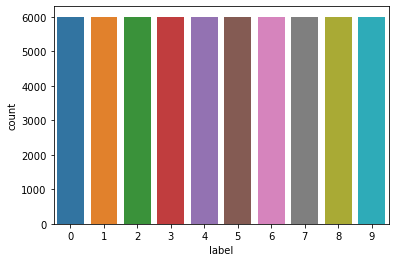

In [13]:
sns.countplot(x='label', data=train_data)


We can see that the data is perfectly balanced

## Data processing

In [40]:
y= train_data["label"]
X= train_data.drop(labels = ["label"], axis = 1)

In [15]:
X = X/ 255.0

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.1, random_state=21)

## Training some models before PCA

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score( y_test , y_pred))

In [ ]:
xgb_reg = xgb.XGBClassifier(n_estimators = 20,n_jobs = -1,learning_rate = 0.5, seed = 0)
xgb_reg.fit(X_train,y_train)
y_pred = xgb_reg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test , y_pred))

 we cant see much difrennt between the models 
 now lets pca and some fine tuning to improve and accelerate the model


## PCA


In [17]:
n_components = 85
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

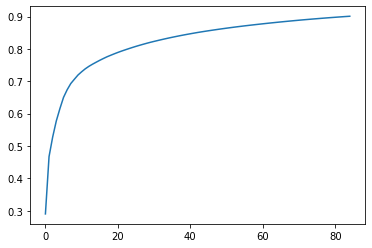

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [20]:
clf=RandomForestClassifier(n_estimators=150,criterion='gini',)
clf.fit(X_train_pca, y_train)
y_pred=clf.predict(X_test_pca)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.8668333333333333


In [22]:
xgb_reg = xgb.XGBClassifier(n_estimators = 180,n_jobs = -1,learning_rate = 0.5, seed = 0 ,cv =5,max_depth=18)
xgb_reg.fit(X_train_pca, y_train)

y_pred = xgb_reg.predict(X_test_pca)
print("Accuracy:",metrics.accuracy_score(y_test , y_pred))

[08:51:41] WARNING: ..\src\learner.cc:541: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:51:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8828333333333334


In [23]:
gbrt = GradientBoostingClassifier()


In [24]:
rf = clf
gbrt = GradientBoostingClassifier()
xg  =  xgb_reg

In [25]:
estimator_list = [
    ('rf',rf),
    ('xg',xg),
     ('gbrt',gbrt),
]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(),cv =5
)
stack_model.fit(X_train_pca, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train_pca)
y_test_pred = stack_model.predict(X_test_pca)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:27] WARNING: ..\src\learner.cc:541: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:57:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:31:19] WARNING: ..\src\learner.cc:541: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:31:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:34:33] WARNING: ..\src\learner.cc:541: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:34:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.8833333333333333
- MCC: 0.8703862975563283
- F1 score: 0.8828500757927549


In [31]:
X_testdata = test_data.drop(labels = ["label"], axis = 1) 
y_testdata = test_data["label"]
X_testdata = X_testdata/255.0

In [32]:
X_test_reduced = pca.transform(X_testdata)

In [29]:
final_xgb = xgb_reg.predict(X_test_reduced)
print("XGBoost Algo Result : ",xgb_reg.score(X_test_reduced,y_testdata))

XGBoost Algo Result :  0.8823


In [37]:
final_stack = stack_model.predict(X_test_reduced)
print("stack model Algo Result : ",stack_model.score(X_test_reduced,y_testdata))

stack model Algo Result :  0.8829
